# <ins>Exploration Project - Dr. Semmelweis and the Discovery of Handwashing<ins>
Analyzing the data that led to one of the most important discoveries of modern medicine: handwashing.

## Context
- The data shows the number of women giving birth from the year 1841 to 1846 at the Vienna General Hospital.
- Unfortunatly, giving birth at those times was very dangerous, and an alarming number of women died during childbirth due to what is known as __childbed fever__.

#### *From Wikipedia*
"Postpartum infections, also known as __childbed fever__ and puerperal fever, are any bacterial infections of the female reproductive tract following childbirth or miscarriage."

"puerperal fever, or childbed fever, was rampant, sometimes climbing to __40 percent of admitted patients__"

#### *About Dr. Ignaz Semmelweis*
- Dr. Ignaz Semmelweis is a Hungarian physician that worked in the Vienna General Hospital maternity clinic on a 3-year contract from 1846–1849.
- He was distrubed by the huge numbers of mortality rates, and after analyzing the mortality rates within the hospital, he was quite sure about the cause of it.
- He figured, that the __cause of the childbirth mortality was due to infections__.
- Eventually, he developed a theory of infections, in which he theorized that __decaying matter on the hands of doctors__ who were involed in autopsies, __are infecting the women__ at contact with the doctors during childbirth. 
- At June 1847 __Dr. Ignaz Semmelweis has implemented a handwashing policy__ for doctors in the matrnity clinic.
- In this project Ill try to explore the mortality rates __prior__ to Dr. Ignaz Semmelweis's handwash policy, and analyze the data that made Dr. Ignaz Semmelweis realize something is wrong with the procedures at Vienna General Hospital.

## Imports and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
sns.set_style('whitegrid')
from scipy import stats
from bs4 import BeautifulSoup
import requests

In [2]:
def sql(query):
    '''
    Generates a Pandas Dataframe using SQL syntax.
    
    Parameters
    ----------
        arg_1 : SQL query(String)
    
    Returns
    -------
        Pandas DataFrame
    '''
    
    return ps.sqldf(query)


def ecdf(data):
    '''
    Compute ECDF for a one-dimensional array of measurements.
    
    Parameters
    ----------
        args_1 : 1D NumyPy Array or 1D Pandas Series
    
    Returns
    -------
        x, y variables for plotting ECDF
    
    '''
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def t_test(df1, df2, confidence_level = 0.05):
    '''
    Performing a Student's T-test.
    
    Parameters
    ----------
        args_1 : df1(Type: Pandas DataFrame)
        args_2 : df2(Type: Pandas DataFrame)
        args_3 : confidence_level(Type: Float, Default: 0.05)
    '''
    
    print("***Performing a Student's T-test***")
    
    statistic , p_value = stats.ttest_ind(df1, df2)
    print('\nThe P-Value for the T-test is: {:.5f}'.format(p_value[1]))
    if p_value[1] < confidence_level:
        print('Rejecting the Null Hypothesis - The Difference in Mean is Statistically Siginificant')
    else:
        print('Unable to Reject the Null Hypothesis - The Difference in Mean is NOT Statistically Siginificant')

## The Data

In [3]:
# Loading the data
yearly_deaths = pd.read_csv('yearly_deaths_by_clinic.csv').drop('Unnamed: 0', axis = 'columns')
yearly_deaths

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## Rate of death in each clinic

- The table above shows the mortatlity rates of two clinics in the hospital, lets look into the proporations of deaths in each clinic

In [4]:
# Summing up the Number of Childbirths per clinic
births_by_clinic = pd.DataFrame(yearly_deaths.groupby('clinic')['births'].sum()).rename(columns = { 'births' :'Number of Childbirths'})
births_by_clinic

,Number of Childbirths
clinic,
clinic 1,20042
clinic 2,17791


In [5]:
# Summing up the Number of Deaths per clinic
deaths_by_clinic = pd.DataFrame(yearly_deaths.groupby('clinic')['deaths'].sum()).rename(columns = {'deaths':'Number of Deaths'})
deaths_by_clinic

,Number of Deaths
clinic,
clinic 1,1989
clinic 2,691


In [6]:
# Calculating the proporations of death in clinic 1
clinic1_proportions = round(deaths_by_clinic.iloc[0,0] / births_by_clinic.iloc[0,0],2)
print('Rate of Death in Clinic 1 is: {}'.format(clinic1_proportions))

Rate of Death in Clinic 1 is: 0.1


In [7]:
# Calculating the proporations of death in clinic 1
clinic2_proportions = round(deaths_by_clinic.iloc[1,0] / births_by_clinic.iloc[1,0],2)
print('Rate of Death in Clinic 2 is: {}'.format(clinic2_proportions))

Rate of Death in Clinic 2 is: 0.04


## Cumulative Plots

In [8]:
# Using SQL syntax to Create a Dataframe for each of the clinics
query1 = '''SELECT year, deaths
            From yearly_deaths
            WHERE clinic = "clinic 1"
            '''
query2 = '''SELECT year, deaths
            From yearly_deaths
            WHERE clinic = "clinic 2"
            '''
clinic1_df = sql(query1)
clinic2_df = sql(query2)

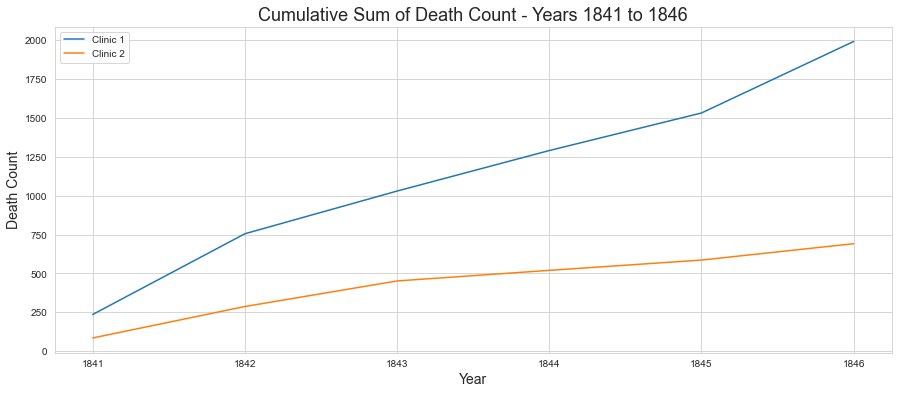

In [9]:
# Plotting a Cumulative Sum of all the deaths throughout the years 1841 to 1846
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(clinic1_df['year'], clinic1_df['deaths'].cumsum(), label = 'Clinic 1')
ax.plot(clinic2_df['year'], clinic2_df['deaths'].cumsum(), label = 'Clinic 2')
plt.xlabel('Year', size = 14)
plt.ylabel('Death Count', size = 14)
plt.title('Cumulative Sum of Death Count - Years 1841 to 1846', size = 18)
plt.legend()
plt.show()

In [10]:
# Generating x and y variables to plot the Estimated Cumulative Distribution Function(ecdf)
x_clinic1, y_clinic1 = ecdf(clinic1_df.deaths)
x_clinic2, y_clinic2 = ecdf(clinic2_df.deaths)

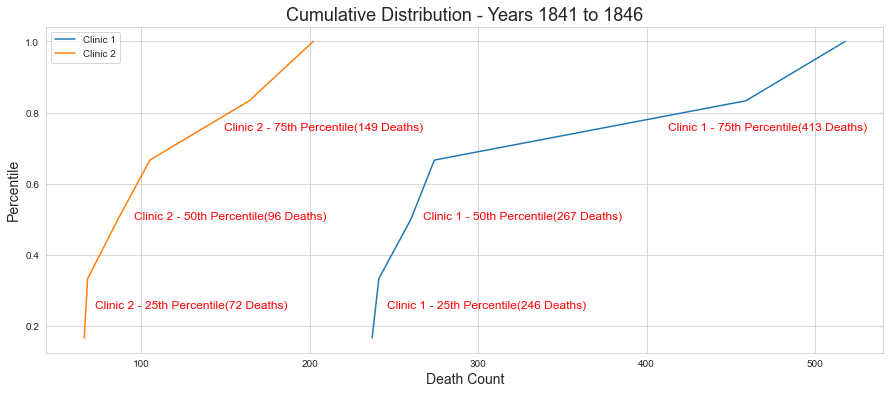

In [11]:
# Plotting the ecdf and annotating the 25th 50th and the 75th percentile of death count per clinic
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(x_clinic1, y_clinic1, label = 'Clinic 1')
ax.plot(x_clinic2, y_clinic2, label = 'Clinic 2')
plt.xlabel('Death Count', size = 14)
plt.ylabel('Percentile', size = 14)
plt.title('Cumulative Distribution - Years 1841 to 1846', size = 18)
plt.annotate('Clinic 1 - 25th Percentile({:.0f} Deaths)'.format(np.quantile(clinic1_df.deaths, 0.25)), xy = (np.quantile(clinic1_df.deaths,0.25),0.25), color = 'r', size = 12)
plt.annotate('Clinic 2 - 25th Percentile({:.0f} Deaths)'.format(np.quantile(clinic2_df.deaths, 0.25)), xy = (np.quantile(clinic2_df.deaths, 0.25), 0.25), color = 'r', size = 12)
plt.annotate('Clinic 1 - 50th Percentile({:.0f} Deaths)'.format(np.median(clinic1_df.deaths)), xy = (np.median(clinic1_df.deaths),0.5), color = 'r', size = 12)
plt.annotate('Clinic 2 - 50th Percentile({:.0f} Deaths)'.format(np.median(clinic2_df.deaths)), xy = (np.median(clinic2_df.deaths), 0.5), color = 'r', size = 12)
plt.annotate('Clinic 1 - 75th Percentile({:.0f} Deaths)'.format(np.quantile(clinic1_df.deaths,0.75)), xy = (np.quantile(clinic1_df.deaths,0.75),0.75), color = 'r', size = 12)
plt.annotate('Clinic 2 - 75th Percentile({:.0f} Deaths)'.format(np.quantile(clinic2_df.deaths,0.75)), xy = (np.quantile(clinic2_df.deaths,0.75), 0.75), color = 'r', size = 12)
plt.legend()
plt.show()

#### Notes:
- As we can see, about __1 in 10 women died during childbirth in clinic 1, and about 1 in 25 in clinic 2__.
- Also just by looking at these plots we can tell that __there is a clear difference in mortality rates__ between the two clinics.
- This difference is one of the first things that led Dr. Ignaz Semmelweis to the policy of handwashing.


### ** Some domain Knowledge from wikipedia **
- It turns out, that clinic 1 was mostly served by medical students, while clinic 2 was mostly served midwife students.
- Also, the __clinic 1 medical students were also incharge of the autopsy rooms__ and they spent some of their time examining corepses.
- Dr. Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever.

## Hypothesis Testing
- Before jumping to conclusion lets perform an Hypothesis Test if the difference between the clinics is Significant.
- The test will be a Student's T-test due to the small sample size.
- Lets define:
    - __Null Hypothesis__: The mean clinic 1 is *equal* to clinic 2.
    - __Alternate Hypothesis__: The mean in clinic 1 is statistically *different* than clinic 2.
    - Required Confidence Level - 0.05

In [12]:
# Performing a Student's T-test 
t_test(clinic1_df, clinic2_df)

***Performing a Student's T-test***

The P-Value for the T-test is: 0.00294
Rejecting the Null Hypothesis - The Difference in Mean is Statistically Siginificant


#### Notes:
- So it turns out that Dr. Ignaz Semmelweis was correct!
- The two clinics are different after all.
- At this point in time, Dr. Ignaz Semmelweis in a desperate attempt to stop the high mortality rates, decreed: *Wash your hands!*
- This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. 
- __Let's import the monthly data of Clinic 1 from Wikipedia to see if the handwashing had any effect.__

## Web Scraping from Wiki - Monthly Data

In [13]:
# Setting the required URL address 
wiki_url = 'https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever'
table_class="wikitable sortable jquery-tablesorter"

# Sending to Wikipedia a GET request
response = requests.get(wiki_url)

# Recieving the response code from Wikipedia
status_code = response.status_code

# Checking if Access is Authorized
if status_code == 200:
    print('Access Authorized')
else:
    print('No Access')
print()

Access Authorized



In [14]:
# Parsing the response in an HTML format
soup = BeautifulSoup(response.text, 'html.parser')

# Finding the required table from the Wikipedia page
table=soup.find('table',{'class':"wikitable"})

In [15]:
# Reading table data
clinic1_monthly_df = pd.read_html(str(table))

# Converting list to dataframe
clinic1_monthly_df = pd.DataFrame(clinic1_monthly_df[0]).drop(columns = ['Year', 'Notes'], axis = 1)
clinic1_monthly_df.head(12)

,Month,Births,Deaths,Rate (%)
0,January 1841,254,37,14.6
1,February 1841,239,18,7.5
2,March 1841,277,12,4.3
3,April 1841,255,4,1.6
4,May 1841,255,2,0.8
5,June 1841,200,10,5.0
6,July 1841,190,16,8.4
7,August 1841,222,3,1.4
8,September 1841,213,4,1.9
9,October 1841,236,26,11.0


#### Notes:
- This data shows the monthly death rates of women before and after the handwashing policy was implemented.
- Lets see how much the policy affected the death rates.

## Analyzing data before and after the handwashing policy

### Some Pre-Processing First

In [16]:
# Checking the feature's data type
print(clinic1_monthly_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     99 non-null     object
 1   Births    99 non-null     object
 2   Deaths    99 non-null     object
 3   Rate (%)  99 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB
None


- The features are of type "object", each feature needs to be changed to a more appropriate type.

In [17]:
# Checking for missing values
clinic1_monthly_df.isna().sum()

Month       0
Births      0
Deaths      0
Rate (%)    0
dtype: int64

- No missing values

In [18]:
# Sorting the Birth feature
clinic1_monthly_df.Births.sort_values(ascending = False)

11     na
98    406
96    403
97    389
95    373
     ... 
5     200
29    196
31    193
30    191
6     190
Name: Births, Length: 99, dtype: object

- Birth column has a "na" value, Ill need to get rid of that in order to change the data type.

In [19]:
# Finding the index to drop
index_to_drop = clinic1_monthly_df[clinic1_monthly_df.Births.str.find('na') == 0].index[0]
index_to_drop

11

In [20]:
# Dropping the index
clinic1_monthly_df.drop(index=index_to_drop, inplace = True)

In [21]:
# Changing each column to a more appropriate data type
clinic1_monthly_df['Births'] = clinic1_monthly_df.Births.astype('int')
clinic1_monthly_df['Deaths'] = clinic1_monthly_df.Deaths.astype('int')
clinic1_monthly_df['Rate (%)'] = clinic1_monthly_df['Rate (%)'].astype('float')
clinic1_monthly_df['Month'] = pd.to_datetime(clinic1_monthly_df.Month)

In [23]:
# Checking the new data types
clinic1_monthly_df.dtypes

Month       datetime64[ns]
Births               int32
Deaths               int32
Rate (%)           float64
dtype: object

In [24]:
# Setting the Month datetime column as the index
clinic1_monthly_df = clinic1_monthly_df.set_index('Month')

In [25]:
# New Dataframe look like this
clinic1_monthly_df

,Births,Deaths,Rate (%)
Month,,,
1841-01-01,254,37,14.6
1841-02-01,239,18,7.5
1841-03-01,277,12,4.3
1841-04-01,255,4,1.6
1841-05-01,255,2,0.8
...,...,...,...
1848-11-01,310,9,2.9
1848-12-01,373,5,1.3
1849-01-01,403,9,2.2


### Plotting the effects of the handwashing policy
- According to Wiki, the handwashing policy started around: Mid 1847 

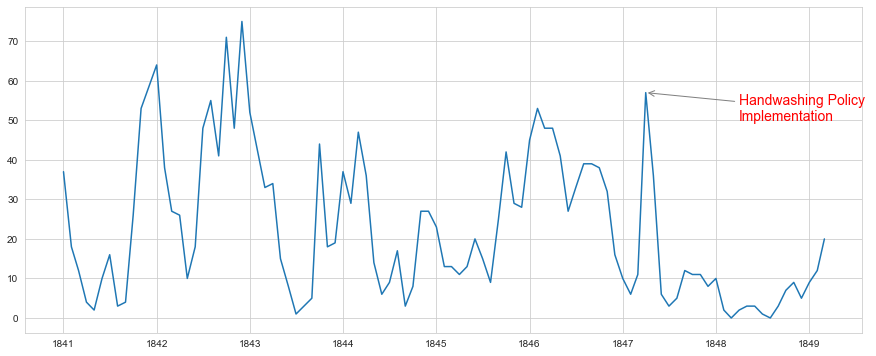

In [43]:
number_of_deaths_pre_policy = clinic1_monthly_df[clinic1_monthly_df.index == '1847-04-01'].Deaths[0]

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(clinic1_monthly_df.index, clinic1_monthly_df.Deaths)
plt.annotate('Handwashing Policy \nImplementation',xy = (pd.Timestamp('1847-04-01'),number_of_deaths_pre_policy), color = 'r',
                size = 14, arrowprops = {'arrowstyle':'->', 'color':'gray'}, xytext = (pd.Timestamp('1848-04-01'),50))

plt.show()

- Look like washing the new policy in clinic 1 almost immediately reduced the number of deaths.

### Dividing the data set to before and after the handwashing policy.


In [28]:
pre_policy_df = clinic1_monthly_df[clinic1_monthly_df.index < '1847-05-01']
pre_policy_df.tail()

,Births,Deaths,Rate (%)
Month,,,
1846-12-01,298,16,5.4
1847-01-01,311,10,3.2
1847-02-01,312,6,1.9
1847-03-01,305,11,3.6
1847-04-01,312,57,18.3


In [29]:
after_policy_df = clinic1_monthly_df[clinic1_monthly_df.index >= '1847-05-01']
after_policy_df.head()

,Births,Deaths,Rate (%)
Month,,,
1847-05-01,294,36,12.2
1847-06-01,268,6,2.2
1847-07-01,250,3,1.2
1847-08-01,264,5,1.9
1847-09-01,262,12,4.6


### Analyzing the differences

In [30]:
pre_policy_df.describe()

,Births,Deaths,Rate (%)
count,75.000000,75.000000,75.000000
mean,257.026667,26.986667,10.481333
std,34.241974,18.026627,7.119989
min,190.000000,1.000000,0.500000
25%,236.500000,11.500000,4.400000
50%,254.000000,26.000000,10.500000
75%,278.500000,40.000000,15.100000
max,336.000000,75.000000,31.400000


In [31]:
after_policy_df.describe()

,Births,Deaths,Rate (%)
count,23.000000,23.000000,23.000000
mean,299.521739,7.739130,2.547826
std,47.997035,7.846351,2.573443
min,246.000000,0.000000,0.000000
25%,266.000000,3.000000,1.000000
50%,283.000000,6.000000,2.200000
75%,311.000000,10.500000,3.300000
max,406.000000,36.000000,12.200000


#### Notes:
- So Its clear that there are huge differences before and after the handwashing policy.
- __The average number of deaths post policy is about 3 times as lower!!!__
- Lets check out the distribution of Death counts pre and post policy

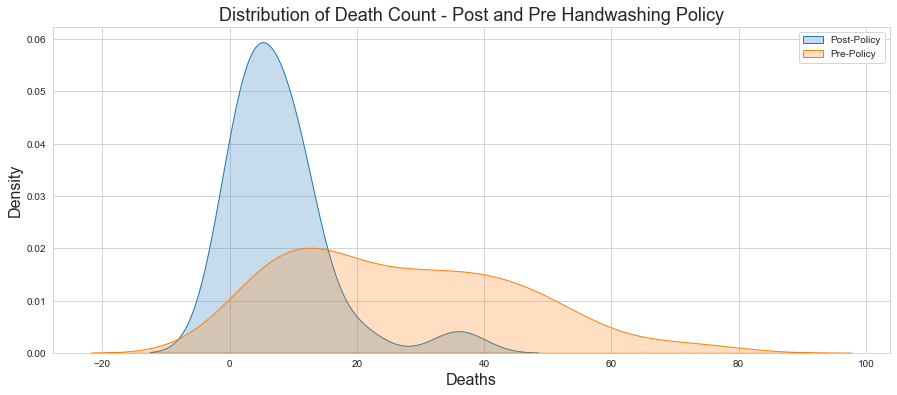

In [32]:
# Checking out the Kernel Density Estimation of each Dataframe
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.kdeplot(data = after_policy_df, x = after_policy_df.Deaths, shade = True, label = 'Post-Policy')
ax = sns.kdeplot(data = pre_policy_df, x = pre_policy_df.Deaths, shade =True, label = 'Pre-Policy')
plt.xlabel('Deaths', size = 16)
plt.ylabel('Density', size = 16)
plt.title('Distribution of Death Count - Post and Pre Handwashing Policy', size = 18)
plt.legend()
plt.show()

#### Notes:
- There is a clear difference, but again, before jumping to conclutions __lets perform an hypothesis test to see if the differences is significant.__
- This time ill use a __Bootstrap Analysis of the data__.
- The goal of the analysis is to resmaple the data and thus create replicates it.
- This will allow us to check whether or not __the difference in the average number of deaths between the two clinics, will remain different even if we were to take A LOT of samples from each clinic.__
- If so, we can declare that the difference in the two samples of data(pre and post handwashing policy), is __Statistically Significant__, and will prove that the policy did in fact worked and it was __NOT a matter of random chance__.

In [57]:
# Creating 10000 samples of the pre and post policy data
pre_policy_bootstrap_sample = np.random.choice(pre_policy_df.Deaths, size = 10000)
post_policy_bootstrap_sample = np.random.choice(after_policy_df.Deaths, size = 10000)

# Calculating the difference in mean
mean_diff = round(np.mean(post_policy_bootstrap_sample) - np.mean(pre_policy_bootstrap_sample),5)
mean_diff

-19.4068

- So it looks like the policy has decresed the mean number of deaths in about 19 deaths per month!!
- Lets calculate a 95% Confidence interval to see the full extent of the benefits of the handwashing policy.

In [68]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = np.random.choice(pre_policy_df.Deaths, size = 10000)
    boot_after = np.random.choice(after_policy_df.Deaths, size = 10000)
    boot_mean_diff.append( np.mean(boot_after) - np.mean(boot_before) )



In [75]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -19.63495
0.975   -18.87719
dtype: float64

- In other words, I can say with a 95% confidence that after the handwashing policy, the average number of deaths will decrease by up to 18.87 to 19.63 per month!!!
- And its all thanks to Dr. Semmelweis and his Discovery of Handwashing.